In [1]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import lightkurve_stitching as lks

## Define Target and Stitch Sectors

In [2]:
# set light curve properties
target = '349902873'
sectors = np.arange(27,40,1)
sectors = [str(i) for i in sectors]

# stitch light curves
lc = lks.prep_data(target, sectors, 1)

## Calculate Frequency and Periods of Modes

Use small window and bring the min_pwr down depending on LK documentation

In [7]:
# list of frequencies and periods at max power within each window
f = []
p = []
pwr = []

# frequency to stop analyzing at
end = 35

# minimum power to be considered significant
min_pwr = 0.0001

# start values of the frequency window
min_f = 0
max_f = 2

# value to move frequency window by
n = 2

while max_f <= end:
    # create periodogram within window
    pg = lc.to_periodogram(min_frequency = min_f, max_frequency = max_f) 
    
    # calculate frequency and period at max power
    F = pg.frequency_at_max_power
    P = pg.period_at_max_power
    
    # append frequency and period to list
    if pg.max_power > min_pwr:
        f.append(F.value)
        p.append(P.value)
        pwr.append(pg.max_power.value)
        
        # increase window by amount n
        min_f += n
        max_f += n
    else:
        # increase window by amount n
        min_f += n
        max_f += n
        
# Calculate change in f and p per point
delta_f = []
delta_p = []

for i in range(len(f) - 1):
    n = f[i+1] - f[i]
    delta_f.append(n)

for i in range(len(p) - 1):
    n = p[i] - p[i+1]
    delta_p.append(n)

## Periodogram and Mode Measurement

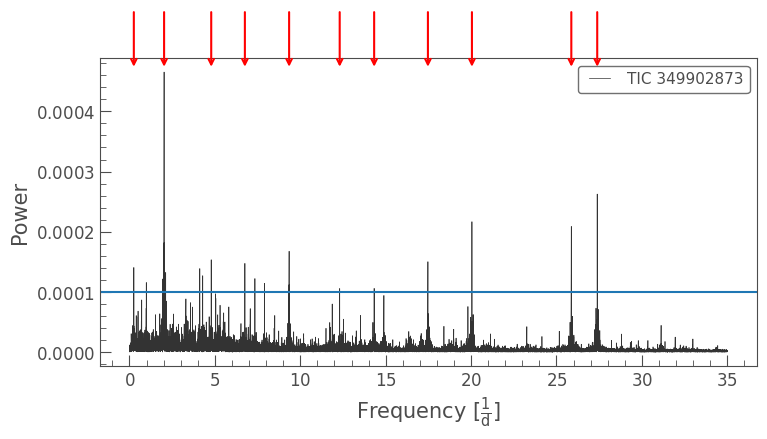

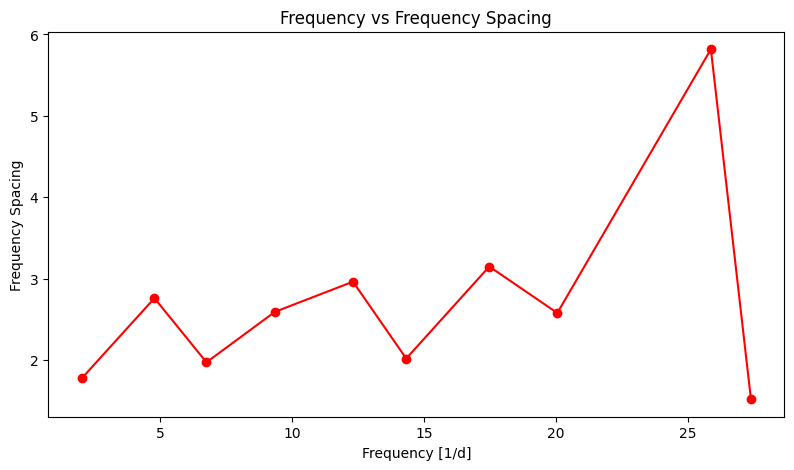

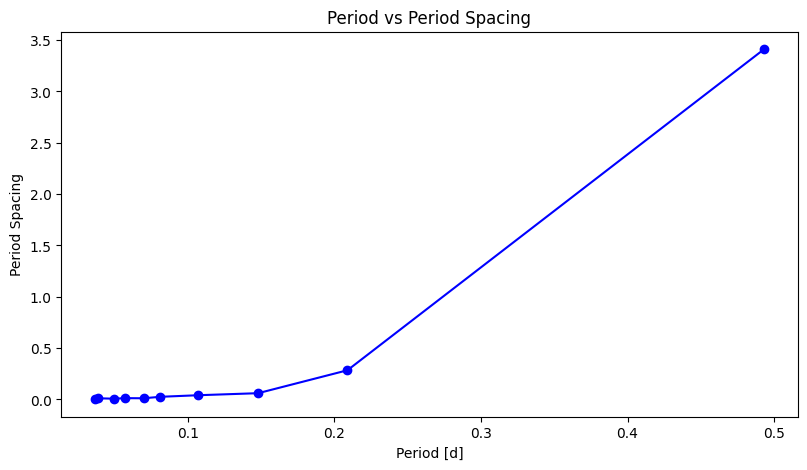

In [18]:
# highest power
h = max(pwr)

# plot periodogram plus significant frequencies      
pg = lc.to_periodogram(minimum_frequency=0, maximum_frequency = 35)

# define frequency arrays
freq = pg.frequency.value
power = pg.power.value

ax = pg.plot()
ax.axhline(y=min_pwr)

for i in range(len(f)):
    ax.annotate('',
                xy=(f[i], h),
                xytext=(f[i], h + 0.0001),
                arrowprops=dict(arrowstyle='->', color='red', linewidth=1.5))

plt.figure(figsize=(9.5,5))
plt.title('Frequency vs Frequency Spacing')
plt.plot(f[1:17], delta_f, marker='o', color='red')
plt.xlabel('Frequency [1/d]')
plt.ylabel('Frequency Spacing')
plt.show()

plt.figure(figsize=(9.5,5))
plt.title('Period vs Period Spacing')
plt.plot(p[1:17], delta_p, marker='o', color='b')
plt.xlabel('Period [d]')
plt.ylabel('Period Spacing')
plt.show()

Text(0, 0.5, 'Period Spacing')

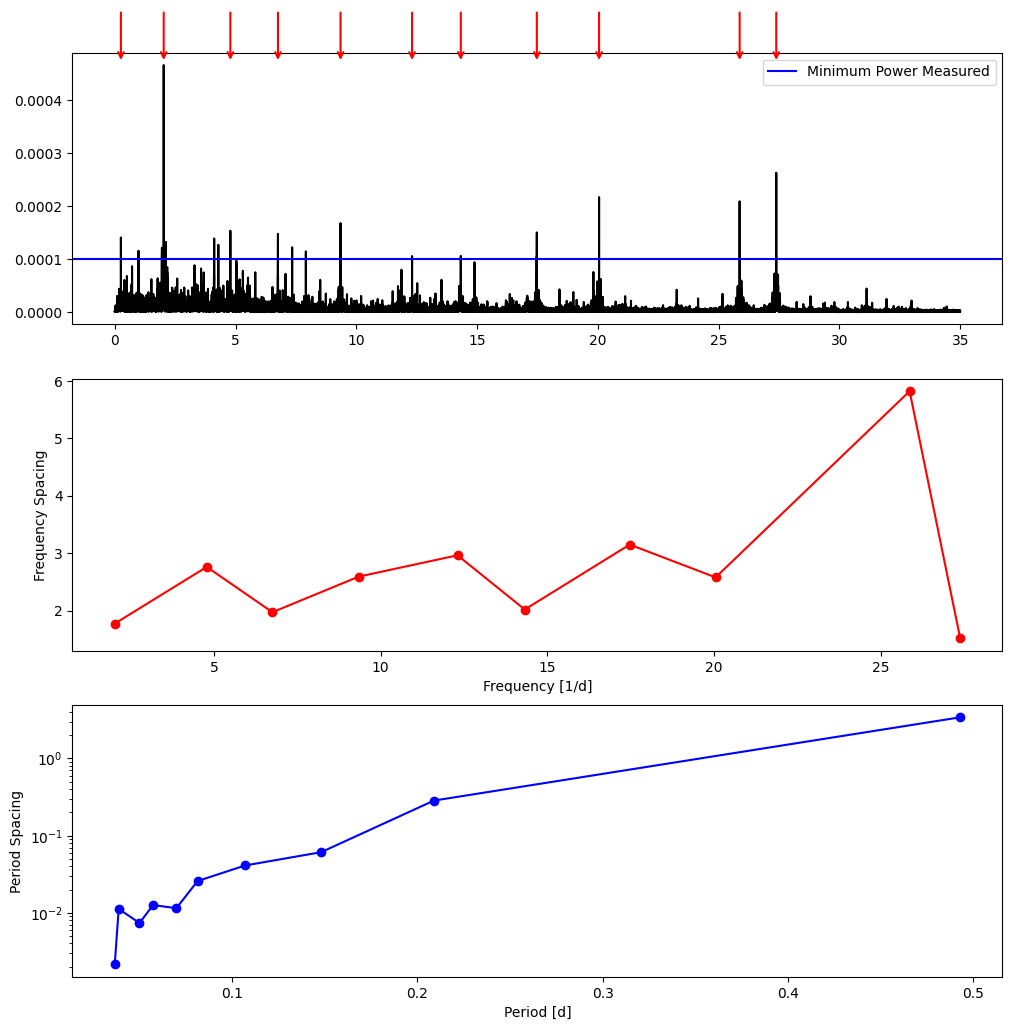

In [37]:
fig, axs = plt.subplots(3,1, figsize=(12,12))

# plot periodogram
axs[0].plot(freq, power, color = 'k')
axs[0].axhline(y=min_pwr, color = 'b', label = 'Minimum Power Measured')
# add labels of significant frequencies
for i in range(len(f)):
    axs[0].annotate('',
                xy=(f[i], h),
                xytext=(f[i], h + 0.0001),
                arrowprops=dict(arrowstyle='->', color='red', linewidth=1.5))
axs[0].legend()

# plot frequency vs change in frequency
axs[1].plot(f[1:17], delta_f, marker='o', color='red')
axs[1].set_xlabel('Frequency [1/d]')
axs[1].set_ylabel('Frequency Spacing')

# plot period vs change in period
axs[2].plot(p[1:17], delta_p, marker='o', color='b')
axs[2].set_yscale('log')
axs[2].set_xlabel('Period [d]')
axs[2].set_ylabel('Period Spacing')